In [130]:
import os
import pandas as pd
import json
import monai
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# Validation

In [112]:

# Creating  tables
path = "/mnt/ceib/datalake/FISABIO_datalake/p0042021"
derivatives_path = "/mnt/ceib/datalake/FISABIO_datalake/p0042021/derivatives/creating_adc"
t2_list = []
adc_list = []
dwi_list = []

# Creating a list of all the files in the directory starting with sub-*
subjects = [f for f in os.listdir(path) if f.startswith("sub-")]
derivatives_subs = [f for f in os.listdir(derivatives_path) if f.startswith("sub-")]

for sub in subjects:
    derivative_sessions=None
    if sub in derivatives_subs:
        derivative_sessions = [f for f in os.listdir(os.path.join(derivatives_path, sub)) if f.startswith("ses-")]
    sessions = [f for f in os.listdir(os.path.join(path, sub)) if f.startswith("ses-")]
    for ses in sessions:
        # Check if the anat and dwi paths exist
        anat_path = os.path.join(path, sub, ses,'mim-mr','anat')
        dwi_path = os.path.join(path, sub, ses,'mim-mr','dwi')

        if os.path.exists(anat_path):
            images_anat = [f for f in os.listdir(anat_path) if f.endswith(".nii.gz")]
            for img in images_anat:
                if 'T2w' in img and 'chunk' not in img:
                    json_path = os.path.join(path, sub, ses,'mim-mr','anat', img.replace('.nii.gz', '.json'))
                    with open(json_path) as f:
                        data = json.load(f)
                    #Add json data to the dict image
                    img_dict = {'subject': sub, 'session': ses, 'image': img, 'modality': 'T2w'}
                    img_dict.update(data)
                    t2_list.append(img_dict)
        if os.path.exists(dwi_path):
            images_dwi = [f for f in os.listdir(dwi_path) if f.endswith(".nii.gz")]
            for img in images_dwi:
                if 'bvalue' in img and 'chunk' not in img:
                    json_path = os.path.join(path, sub, ses,'mim-mr','dwi', img.replace('.nii.gz', '.json'))
                    with open(json_path) as f:
                        data = json.load(f)
                    #Add json data to the dict image
                    img_dict = {'subject': sub, 'session': ses, 'image': img, 'modality': 'dwi'}
                    img_dict.update(data)
                    dwi_list.append(img_dict)
                elif 'adc' in img and 'chunk' not in img:
                    json_path = os.path.join(path, sub, ses,'mim-mr','dwi', img.replace('.nii.gz', '.json'))
                    with open(json_path) as f:
                        data = json.load(f)
                    #Add json data to the dict image
                    img_dict = {'subject': sub, 'session': ses, 'image': img, 'modality': 'adc'}
                    img_dict.update(data)
                    adc_list.append(img_dict)
    if derivative_sessions:
        for ses in derivative_sessions:
            der_dwi_path = os.path.join(derivatives_path, sub, ses,'mim-mr','dwi')
            images_dwi = [f for f in os.listdir(der_dwi_path) if f.endswith(".nii.gz")]
            for img in images_dwi:
                json_path = os.path.join(derivatives_path, sub, ses,'mim-mr','dwi', img.replace('.nii.gz', '.json'))
                with open(json_path) as f:
                    data = json.load(f)
                #Add json data to the dict image
                img_dict = {'subject': sub, 'session': ses, 'image': img, 'modality': 'derivative/adc'}
                img_dict.update(data)
                adc_list.append(img_dict)


t2w_df = pd.DataFrame(t2_list)
dwi_df = pd.DataFrame(dwi_list)
adc_df = pd.DataFrame(adc_list)
#Formating the acquisition time as time
t2w_df['AcquisitionTime'] = pd.to_datetime(t2w_df['AcquisitionTime'], format='%H:%M:%S.%f').dt.time
dwi_df['AcquisitionTime'] = pd.to_datetime(dwi_df['AcquisitionTime'], format='%H:%M:%S.%f').dt.time
adc_df['AcquisitionTime'] = pd.to_datetime(adc_df['AcquisitionTime'], format='%H:%M:%S.%f').dt.time

In [113]:
t2w_df

,subject,session,image,modality,AccessionNumber,AcquisitionDateTime,AcquisitionMatrixPE,AcquisitionNumber,AcquisitionTime,AngioFlag,...,WindowCenter,WindowWidth,BodyPartExamined,RawImage,PhaseEncodingSteps,PartialFourier,SequenceName,SliceTiming,InversionTime,Contrast/BolusRoute
0,sub-000063,ses-000063,sub-000063_ses-000063_acq-fse_run-3_bp-p_vp-sa...,T2w,000063,2016-07-07T14:52:47.000000,256,1,14:52:47,N,...,985,1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub-000063,ses-000063,sub-000063_ses-000063_acq-fse_run-6_bp-p_vp-ax...,T2w,000063,2016-07-07T15:02:32.000000,224,1,15:02:32,N,...,888,1776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub-000063,ses-000063,sub-000063_ses-000063_acq-fse_run-8_bp-p_vp-ax...,T2w,000063,2016-07-07T15:13:34.000000,224,1,15:13:34,N,...,1286,2573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub-000066,ses-000066,sub-000066_ses-000066_acq-fse_run-5_bp-p_vp-sa...,T2w,000066,2017-01-27T15:33:36.000000,256,1,15:33:36,N,...,914,1829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub-000066,ses-000066,sub-000066_ses-000066_acq-fse_run-8_bp-p_vp-ax...,T2w,000066,2017-01-27T15:44:32.000000,224,1,15:44:32,N,...,960,1921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,sub-000003,ses-000003,sub-000003_ses-000003_acq-fse_run-8_bp-a_vp-sa...,T2w,000003,2014-03-07T08:27:39.000000,256,1,08:27:39,N,...,660,1320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,sub-000111,ses-000111,sub-000111_ses-000111_acq-fse_run-8_bp-a_vp-ax...,T2w,000111,2015-06-24T19:55:41.000000,224,1,19:55:41,N,...,865,1731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
490,sub-000111,ses-000111,sub-000111_ses-000111_acq-fse_run-5_bp-a_vp-sa...,T2w,000111,2015-06-24T19:43:50.000000,256,1,19:43:50,N,...,1132,2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,sub-000120,ses-000120,sub-000120_ses-000120_acq-fse_run-6_bp-a_vp-sa...,T2w,000120,2014-09-24T08:12:51.000000,256,1,08:12:51,N,...,710,1421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
dwi_df

,subject,session,image,modality,AccessionNumber,AcquisitionDateTime,AcquisitionMatrixPE,AcquisitionNumber,AcquisitionTime,AngioFlag,...,WindowWidth,BodyPartExamined,InversionTime,PhaseEncodingSteps,PartialFourier,RawImage,SequenceName,SliceTiming,PhaseEncodingDirection,PhaseEncodingPolarityGE
0,sub-000063,ses-000063,sub-000063_ses-000063_acq-bvalue_run-13_bp-p_v...,dwi,000063,2016-07-07T15:31:30.000000,64,1,15:31:30,N,...,1712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub-000063,ses-000063,sub-000063_ses-000063_acq-bvalue_run-14_bp-p_v...,dwi,000063,2016-07-07T15:37:3.000000,64,1,15:37:03,N,...,393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub-000063,ses-000063,sub-000063_ses-000063_acq-bvalue_run-15_bp-p_v...,dwi,000063,2016-07-07T15:43:3.000000,64,1,15:43:03,N,...,2319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub-000066,ses-000066,sub-000066_ses-000066_acq-bvalue_run-11_bp-p_v...,dwi,000066,2017-01-27T16:02:40.000000,64,1,16:02:40,N,...,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub-000066,ses-000066,sub-000066_ses-000066_acq-bvalue_run-12_bp-p_v...,dwi,000066,2017-01-27T16:09:52.000000,64,1,16:09:52,N,...,1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,sub-000111,ses-000111,sub-000111_ses-000111_acq-bvalue_run-11_bp-a_v...,dwi,000111,2015-06-24T20:11:17.000000,64,1,20:11:17,N,...,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346,sub-000111,ses-000111,sub-000111_ses-000111_acq-bvalue_run-10_bp-a_v...,dwi,000111,2015-06-24T20:05:41.000000,64,1,20:05:41,N,...,293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,sub-000120,ses-000120,sub-000120_ses-000120_acq-bvalue_run-12_bp-a_v...,dwi,000120,2014-09-24T08:39:13.000000,64,1,08:39:13,N,...,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,sub-000120,ses-000120,sub-000120_ses-000120_acq-bvalue_run-10_bp-a_v...,dwi,000120,2014-09-24T08:28:7.000000,64,1,08:28:07,N,...,347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
adc_df[adc_df.apply(lambda x: 'ax' in x['image'], axis=1)]

,subject,session,image,modality,AccessionNumber,AcquisitionDateTime,AcquisitionMatrixPE,AcquisitionTime,BodyPartExamined,CoilString,...,PhaseEncodingSteps,SAR,AngioFlag,PartialFourier,SequenceName,SliceTiming,DeviceSerialNumber,InstitutionName,StationName,VariableFlipAngleFlag
0,sub-000063,ses-000063,sub-000063_ses-000063_acq-bvalue_run-15_bp-p_v...,derivative/adc,000063,2016-07-07T15:43:3.000000,64,15:43:03,Prostate,HD Cardiac,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub-000063,ses-000063,sub-000063_ses-000063_acq-bvalue_run-14_bp-p_v...,derivative/adc,000063,2016-07-07T15:37:3.000000,64,15:37:03,Prostate,HD Cardiac,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub-000063,ses-000063,sub-000063_ses-000063_acq-bvalue_run-13_bp-p_v...,derivative/adc,000063,2016-07-07T15:31:30.000000,64,15:31:30,Prostate,HD Cardiac,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub-000066,ses-000066,sub-000066_ses-000066_acq-bvalue_run-11_bp-p_v...,derivative/adc,000066,2017-01-27T16:02:40.000000,64,16:02:40,Prostate,HD Cardiac,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sub-000066,ses-000066,sub-000066_ses-000066_acq-bvalue_run-10_bp-p_v...,derivative/adc,000066,2017-01-27T15:56:3.000000,64,15:56:03,Prostate,HD Cardiac,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,sub-000111,ses-000111,sub-000111_ses-000111_acq-bvalue_run-10_bp-a_v...,derivative/adc,000111,2015-06-24T20:05:41.000000,64,20:05:41,Prostate,HD Cardiac,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423,sub-000111,ses-000111,sub-000111_ses-000111_acq-bvalue_run-11_bp-a_v...,derivative/adc,000111,2015-06-24T20:11:17.000000,64,20:11:17,Prostate,HD Cardiac,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
424,sub-000120,ses-000120,sub-000120_ses-000120_acq-bvalue_run-12_bp-a_v...,derivative/adc,000120,2014-09-24T08:39:13.000000,64,08:39:13,Prostate,HD Cardiac,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
425,sub-000120,ses-000120,sub-000120_ses-000120_acq-bvalue_run-11_bp-a_v...,derivative/adc,000120,2014-09-24T08:33:40.000000,64,08:33:40,Prostate,HD Cardiac,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
dwi_df.apply(lambda x: 'ax' in x['image'], axis=1).sum()

350

In [118]:
t2w_axial = t2w_df[t2w_df.apply(lambda x: 'ax' in x['image'], axis=1)].reset_index(drop=True)

In [119]:

index=1
t2w_image_path = os.path.join(path, t2w_axial.subject[index], t2w_axial.session[index],'mim-mr','anat', t2w_axial.image[index])
dwi_image_path = os.path.join(path, dwi_df.subject[index], dwi_df.session[index],'mim-mr','dwi', dwi_df.image[index])

print(t2w_image_path)
print(dwi_image_path)

t2w_image = monai.transforms.LoadImage(ensure_channel_first=True)(t2w_image_path)
dwi_image = monai.transforms.LoadImage(ensure_channel_first=True)(dwi_image_path)

print(t2w_image.shape)
print(dwi_image.shape)

print(t2w_df['AcquisitionDateTime'][index])
print(dwi_df['AcquisitionDateTime'][index])

/mnt/ceib/datalake/FISABIO_datalake/p0042021/sub-000063/ses-000063/mim-mr/anat/sub-000063_ses-000063_acq-fse_run-8_bp-p_vp-ax_T2w.nii.gz
/mnt/ceib/datalake/FISABIO_datalake/p0042021/sub-000063/ses-000063/mim-mr/dwi/sub-000063_ses-000063_acq-bvalue_run-14_bp-p_vp-ax_dwi.nii.gz
torch.Size([1, 512, 512, 28])
torch.Size([2, 256, 256, 28])
2016-07-07T15:02:32.000000
2016-07-07T15:37:3.000000


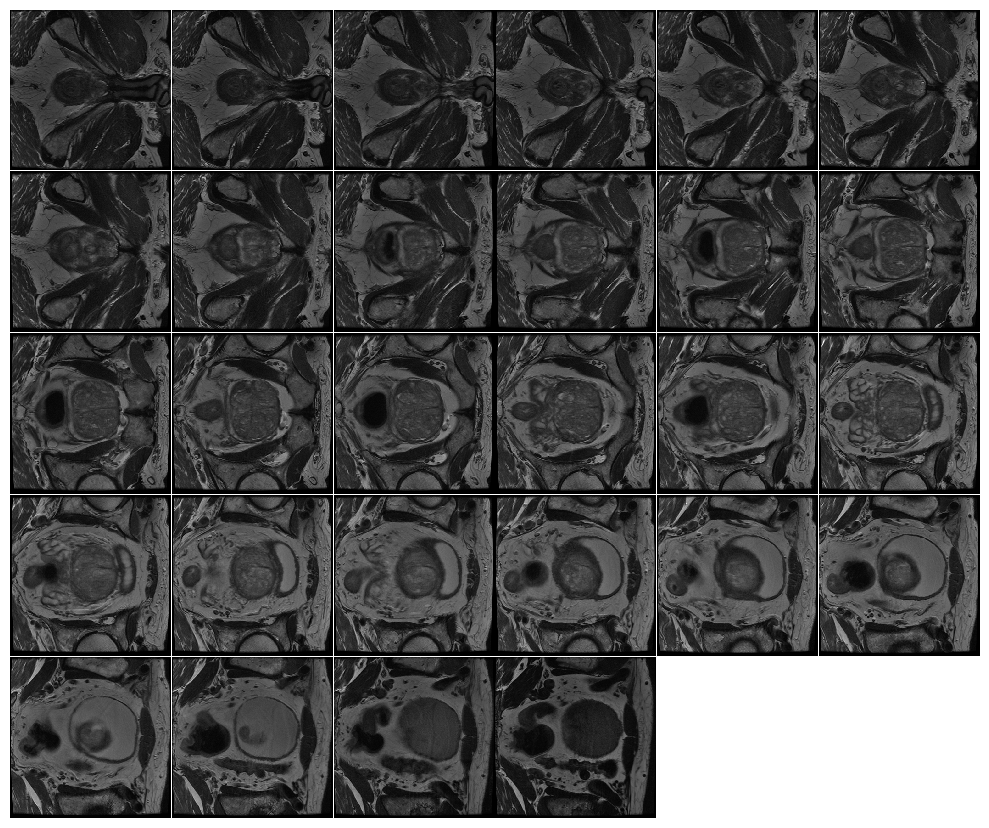

In [120]:
monai.visualize.matshow3d(t2w_image, cmap="gray",channel_dim=0,frame_dim=-1,show=True)
plt.show()

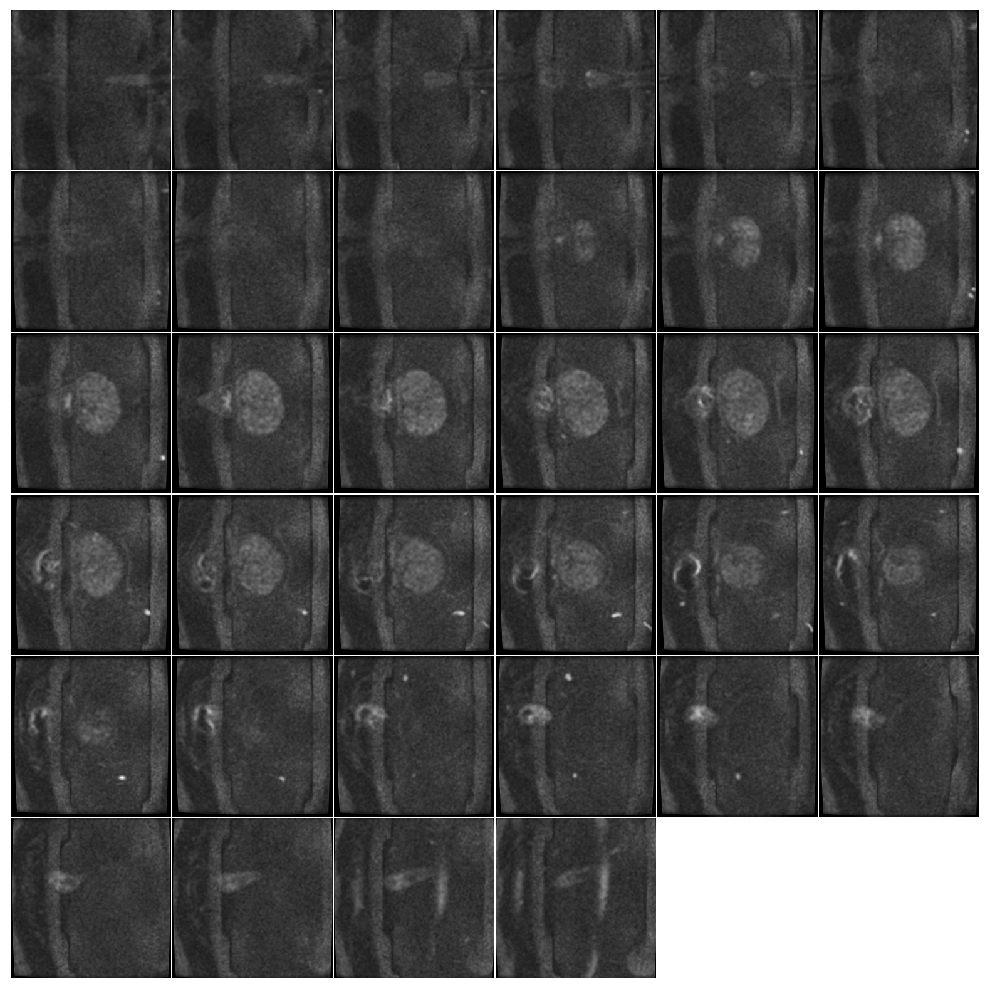

(<Figure size 1000x1000 with 1 Axes>,
 array([[[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],
 
        [[nan],
         [ 0.],
         [ 6.],
         ...,
         [ 0.],
         [ 0.],
         [nan]],
 
        [[nan],
         [ 0.],
         [ 8.],
         ...,
         [ 0.],
         [ 0.],
         [nan]],
 
        ...,
 
        [[nan],
         [ 0.],
         [ 0.],
         ...,
         [nan],
         [nan],
         [nan]],
 
        [[nan],
         [ 0.],
         [ 0.],
         ...,
         [nan],
         [nan],
         [nan]],
 
        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]]], dtype=float32))

In [48]:
monai.visualize.matshow3d(dwi_image[0:1], cmap="gray",channel_dim=0,frame_dim=-1,show=True)

In [153]:
associaiton_list=[]
for i,row in t2w_axial.iterrows():
    subject = row['subject']
    session = row['session']

    sub_dwi_df = dwi_df[(dwi_df['subject'] == subject) & (dwi_df['session'] == session)].reset_index(drop=True)

    if not sub_dwi_df.empty:
        
        times=[]

        adquisition_time_t2 = datetime.combine(datetime.min, row['AcquisitionTime'])
        t2w_image_path = os.path.join(path, t2w_df.subject[index], t2w_df.session[index],'mim-mr','anat', t2w_df.image[index])
        t2w_image = monai.transforms.LoadImage(ensure_channel_first=True)(t2w_image_path)
        print(t2w_image.shape)
        image_t2_slices = t2w_image.shape[-1]
        for i, dwi_row in sub_dwi_df.iterrows():
            dwi_image_path = os.path.join(path, dwi_row['subject'], dwi_row['session'],'mim-mr','dwi', dwi_row['image'])
            dwi_image = monai.transforms.LoadImage(ensure_channel_first=True)(dwi_image_path)
            print(dwi_image.shape)
            image_dwi_slices = dwi_image.shape[-1]
            adquisition_time_dwi = datetime.combine(datetime.min, dwi_row['AcquisitionTime'])
            if abs(image_t2_slices - image_dwi_slices)<5:
                times.append(abs(adquisition_time_t2-adquisition_time_dwi).total_seconds())
        
        if times:
            associaiton_list.append({'subject': subject, 'session': session, 'image_t2': row['image'], 'image_dwi': sub_dwi_df['image'][times.index(min(times))]})

        
    if i==2:
        break

association_df = pd.DataFrame(associaiton_list)

torch.Size([1, 512, 512, 24])
torch.Size([2, 256, 256, 28])
torch.Size([2, 256, 256, 28])
torch.Size([2, 256, 256, 22])


In [154]:
times

[1738.0, 2071.0, 2431.0]

In [155]:
sub_dwi_df

,subject,session,image,modality,AccessionNumber,AcquisitionDateTime,AcquisitionMatrixPE,AcquisitionNumber,AcquisitionTime,AngioFlag,...,WindowWidth,BodyPartExamined,InversionTime,PhaseEncodingSteps,PartialFourier,RawImage,SequenceName,SliceTiming,PhaseEncodingDirection,PhaseEncodingPolarityGE
0,sub-000063,ses-000063,sub-000063_ses-000063_acq-bvalue_run-13_bp-p_v...,dwi,000063,2016-07-07T15:31:30.000000,64,1,15:31:30,N,...,1712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub-000063,ses-000063,sub-000063_ses-000063_acq-bvalue_run-14_bp-p_v...,dwi,000063,2016-07-07T15:37:3.000000,64,1,15:37:03,N,...,393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub-000063,ses-000063,sub-000063_ses-000063_acq-bvalue_run-15_bp-p_v...,dwi,000063,2016-07-07T15:43:3.000000,64,1,15:43:03,N,...,2319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
association_df

,subject,session,image_t2,image_dwi
0,sub-000063,ses-000063,sub-000063_ses-000063_acq-fse_run-6_bp-p_vp-ax...,sub-000063_ses-000063_acq-bvalue_run-13_bp-p_v...
1,sub-000063,ses-000063,sub-000063_ses-000063_acq-fse_run-8_bp-p_vp-ax...,sub-000063_ses-000063_acq-bvalue_run-13_bp-p_v...
2,sub-000108,ses-000108,sub-000108_ses-000108_acq-fse_run-9_bp-a_vp-ax...,sub-000108_ses-000108_acq-bvalue_run-11_bp-a_v...
3,sub-000103,ses-000103,sub-000103_ses-000103_acq-fse_run-8_bp-a_vp-ax...,sub-000103_ses-000103_acq-bvalue_run-10_bp-a_v...
